# Marketing Promotion Campaign

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
data = pd.read_csv("data/marketing.csv")
data

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
...,...,...,...,...,...,...,...,...,...
63995,10,105.54,1,0,Urban,0,Web,Discount,0
63996,5,38.91,0,1,Urban,1,Phone,Discount,0
63997,6,29.99,1,0,Urban,1,Phone,Discount,0
63998,1,552.94,1,0,Surburban,1,Multichannel,Buy One Get One,0


<font size=3> 

**Note on variables:**

- **recency**:  Months since last purchase 
- **history**:  $ value of the historical purchases
- **used_discount**:  If the customer used a discount before
- **used_bogo**:  If the customer used a buy one get one before
- **zip_code**:  Class of the zip code as Suburban/Urban/Rural
- **is_referral**:  If the customer was acquired from referral channel
- **channel**:  Channels that the customer using Phone/Web/Multichannel
- **offer**:  The offers sent to the customers, Discount/But One Get One/No Offer
- **conversion**:  Customer conversion (buy or not , set as  and 0)


<font size=3 color=blue> Check for missing values 

In [9]:
nan = data.isna().sum()
print(nan)

recency          0
history          0
used_discount    0
used_bogo        0
zip_code         0
is_referral      0
channel          0
offer            0
conversion       0
dtype: int64


<font size=3 color=blue> Check on duplicate

In [ ]:
# duplicate_count = data.duplicated().sum()
# print(duplicate_count)

# duplicate_rows = data[data.duplicated()]

In [10]:
data = data.drop_duplicates()
data

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
...,...,...,...,...,...,...,...,...,...
63994,7,86.46,0,1,Urban,0,Web,Discount,0
63995,10,105.54,1,0,Urban,0,Web,Discount,0
63996,5,38.91,0,1,Urban,1,Phone,Discount,0
63998,1,552.94,1,0,Surburban,1,Multichannel,Buy One Get One,0


In [ ]:
#data.describe()

<font size=4 color= blue>  Exploratory Data Analysis (EDA)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57397 entries, 0 to 63999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   recency        57397 non-null  int64  
 1   history        57397 non-null  float64
 2   used_discount  57397 non-null  int64  
 3   used_bogo      57397 non-null  int64  
 4   zip_code       57397 non-null  object 
 5   is_referral    57397 non-null  int64  
 6   channel        57397 non-null  object 
 7   offer          57397 non-null  object 
 8   conversion     57397 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 4.4+ MB


#### Numerical Variables:

In [12]:
used_discount_counts = data['used_discount'].value_counts()
used_bogo_counts = data['used_bogo'].value_counts()
is_referral_counts = data['is_referral'].value_counts()
conversion_counts = data['conversion'].value_counts()

print(used_discount_counts)
print(used_bogo_counts)
print(is_referral_counts)
print(conversion_counts)


used_discount
1    31932
0    25465
Name: count, dtype: int64
used_bogo
1    31913
0    25484
Name: count, dtype: int64
is_referral
1    28827
0    28570
Name: count, dtype: int64
conversion
0    48436
1     8961
Name: count, dtype: int64


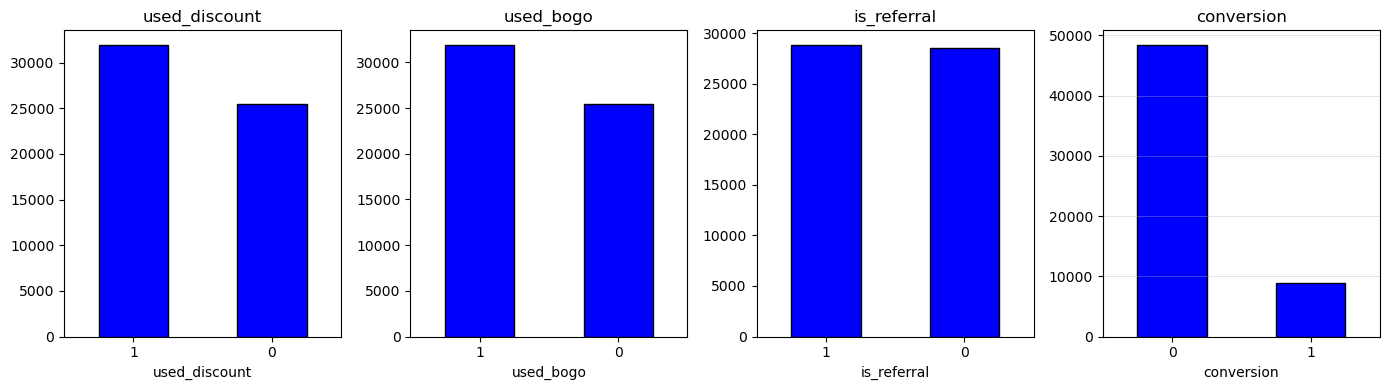

In [13]:
# Visualization
columns = ['used_discount', 'used_bogo', 'is_referral', 'conversion']
counts = [used_discount_counts, used_bogo_counts, is_referral_counts, conversion_counts]

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14, 4))
fig.subplots_adjust(hspace=1.5, wspace=0.8)  

for i, (var, count) in enumerate(zip(columns, counts)):
    ax = axes[i] 
    count.plot(kind='bar', ax=ax, color='blue', edgecolor='black')
    ax.set_title('{}'.format(var))
    ax.set_xlabel(var)
    ax.tick_params(axis='x', rotation=0)

plt.grid(axis='y', linestyle='-', linewidth=0.5, alpha=0.5)
plt.tight_layout()
plt.show()

#### Categorical Variables

In [14]:
zip_code_counts = data['zip_code'].value_counts()
offer_counts = data['offer'].value_counts()
channel_counts = data['channel'].value_counts()

print(zip_code_counts)
print(offer_counts )
print(channel_counts)


zip_code
Surburban    25632
Urban        22976
Rural         8789
Name: count, dtype: int64
offer
Discount           19166
Buy One Get One    19159
No Offer           19072
Name: count, dtype: int64
channel
Web             24887
Phone           24750
Multichannel     7760
Name: count, dtype: int64


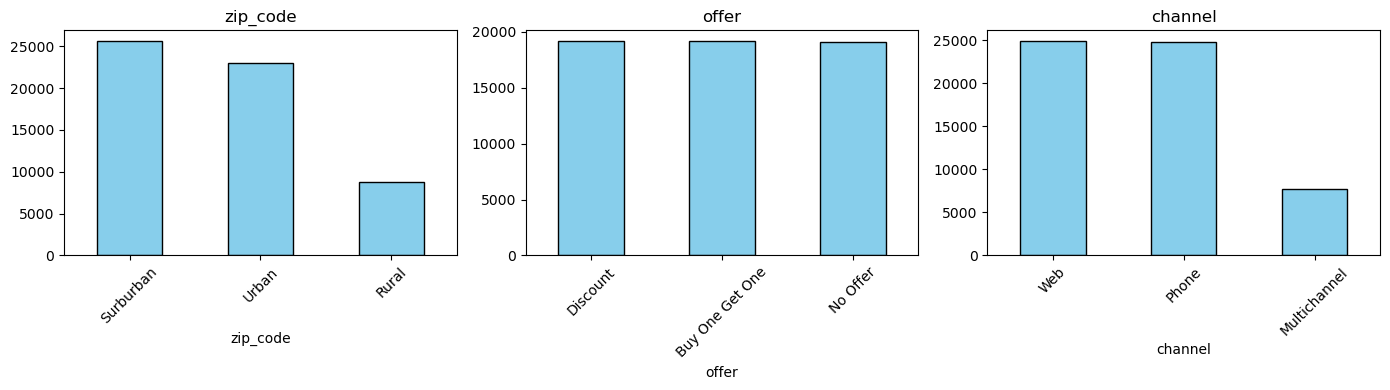

In [20]:
# Visualization
columns = ['zip_code', 'offer', 'channel']
counts = [zip_code_counts, offer_counts, channel_counts]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))
for i, (variable, count) in enumerate(zip(columns, counts)):
    ax = axes[i]  
    count.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
    ax.set_title('{}'.format(variable))
    ax.set_xlabel(variable)
    ax.tick_params(axis='x', rotation=45)
    
#plt.grid(axis='y', linestyle='-', linewidth=0.5, alpha=0.5)
plt.tight_layout()
plt.show()


#####  A/B testing, also known as split testing, is a method to compare two versions (A and B) of a variable to determine which one performs better. In the context of your DataFrame, you might want to perform A/B testing on different groups defined by a categorical variable (e.g., 'channel' or 'offer').

#### Note:  A/B testing involves comparing two or more groups to determine if there are statistically significant differences between them

<font size=5 color= blue> A/B Testing 

<font size=3> 

**Define Hypotheses:**

- **Null Hypothesis (H0)**: There is no difference in conversion rates between customers offered a discount and those offered a BOGO deal.
- **Alternative Hypothesis (H1)**: Customers offered a discount have higher conversion rates compared to those offered a BOGO deal.
        
        
**Select Test and Control Groups:**

- Divide your dataset into two groups: one group will receive the discount offer (A) and the other group will receive the BOGO offer (B).        
        
- Assign the discount offer to one group (Group A) and the BOGO offer to the other group (Group B).  




<font size=3 color= red> Compare conversion rates across group (offer)

In [ ]:
#To test whether offering a discount (A) leads to higher conversion rates compared to offering a Buy One Get One (BOGO) deal (B)

In [19]:

from scipy.stats import chi2_contingency

#Separates the dataset into two groups based on the offer type: Group A (Discount offer) and Group B (BOGO offer).
group_a = data[data['offer'] == 'Discount']
group_b = data[data['offer'] == 'Buy One Get One']
group_c = data[data['offer'] == 'No Offer']               #Try add 'No Offer'

# Calculate conversion rates for each group
conversion_rate_a = group_a['conversion'].mean()
conversion_rate_b = group_b['conversion'].mean()
conversion_rate_c = group_c['conversion'].mean()

print("Conversion rate for Discount offer (Group A):", conversion_rate_a)
print("Conversion rate for BOGO offer (Group B):", conversion_rate_b)
print("Conversion rate for No offer (Group C):", conversion_rate_c)


Conversion rate for Discount offer (Group A): 0.19320672023374727
Conversion rate for BOGO offer (Group B): 0.16018581345581712
Conversion rate for No offer (Group C): 0.11477558724832215


In [17]:
# Perform a chi-squared test to compare conversion rates between the two groups

contingency_table = pd.crosstab(data['offer'], data['conversion'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results of the chi-squared test
print("\nResults of chi-squared test:")
print("Chi-squared statistic:", chi2)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant difference in conversion rates between the two groups.")
else:
    print("\nFail to reject the null hypothesis: There is no significant difference in conversion rates between the two groups.")


Results of chi-squared test:
Chi-squared statistic: 449.94011780493054
p-value: 1.9803630984536353e-98

Reject the null hypothesis: There is a significant difference in conversion rates between the two groups.


In [ ]:
#Perform a one-way ANOVA test to compare conversion rates across Group A (Discount offer) and Group B (BOGO offer)

from scipy.stats import f_oneway

# Separates the dataset into two groups based on the offer type
group_a = data[data['offer'] == 'Discount']['conversion']
group_b = data[data['offer'] == 'Buy One Get One']['conversion']
#group_c = data[data['offer'] == 'Buy One Get One']['conversion']

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(group_a, group_b)

# Print the results of the ANOVA test
print("Results of one-way ANOVA test:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant difference in conversion rates between Group A and Group B.")
else:
    print("\nFail to reject the null hypothesis: There is no significant difference in conversion rates between Group A and Group B.")

[19.320672023374726, 16.018581345581712]


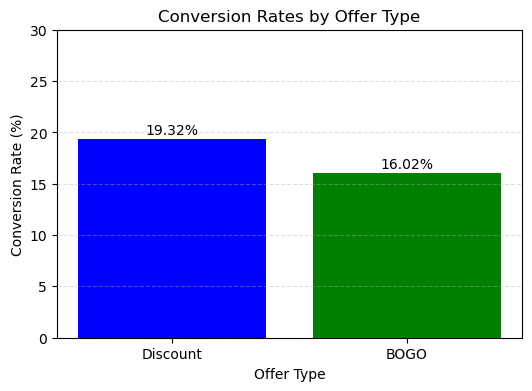

In [18]:
# Bar plot
groups = ['Discount', 'BOGO']
conversion_rates = [conversion_rate_a * 100 , conversion_rate_b * 100 ]     # Convert conversion rates to percentage

print(conversion_rates)


# Create the bar plot
plt.figure(figsize=(6, 4))
plt.bar(groups, conversion_rates, color=['blue', 'green'])
plt.title('Conversion Rates by Offer Type')
plt.xlabel('Offer Type')
plt.ylabel('Conversion Rate (%)')  
plt.ylim(0, 30)  
plt.grid(axis='y', linestyle='--', alpha=0.4)
# Add text labels for each bar
for i in range(len(groups)):
    plt.text(i, conversion_rates[i] + 0.5, f'{conversion_rates[i]:.2f}%', ha='center')

plt.show()

<font size=3 color= red> Compare conversion rates across groups (offer and channel)

In [14]:
# Separate the dataset into groups based on the combination of offer and channel

group_discount_web = data[(data['offer'] == 'Discount') & (data['channel'] == 'Web')]
group_discount_phone = data[(data['offer'] == 'Discount') & (data['channel'] == 'Phone')]
group_bogo_web = data[(data['offer'] == 'Buy One Get One') & (data['channel'] == 'Web')]
group_bogo_phone = data[(data['offer'] == 'Buy One Get One') & (data['channel'] == 'Phone')]

# Calculate conversion rates for each group
conversion_rate_discount_web = group_discount_web['conversion'].mean()
conversion_rate_discount_phone = group_discount_phone['conversion'].mean()
conversion_rate_bogo_web = group_bogo_web['conversion'].mean()
conversion_rate_bogo_phone = group_bogo_phone['conversion'].mean()

# Print the conversion rates for each group
print("Conversion rate for Discount offer received via Web:", conversion_rate_discount_web)
print("Conversion rate for Discount offer received via Phone:", conversion_rate_discount_phone)
print("Conversion rate for BOGO offer received via Web:", conversion_rate_bogo_web)
print("Conversion rate for BOGO offer received via Phone:", conversion_rate_bogo_phone)

Conversion rate for Discount offer received via Web: 0.2061487130600572
Conversion rate for Discount offer received via Phone: 0.17421007685738685
Conversion rate for BOGO offer received via Web: 0.17445671967949497
Conversion rate for BOGO offer received via Phone: 0.1413160733549083


In [30]:
# Perform one-way ANOVA to compare conversion rates across groups
f_statistic, p_value = f_oneway(group_discount_web['conversion'], group_discount_phone['conversion'],
                                 group_bogo_web['conversion'], group_bogo_phone['conversion'])

# Print the results of the ANOVA test
print("\nResults of one-way ANOVA test:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant difference in conversion rates between the groups.")
else:
    print("\nFail to reject the null hypothesis: There is no significant difference in conversion rates between the groups.")


Results of one-way ANOVA test:
F-statistic: 40.92189859613589
p-value: 2.188605973888673e-26

Reject the null hypothesis: There is a significant difference in conversion rates between the groups.


In [ ]:
#Note from above 
#1 separates the dataset into four groups based on the combination of offer type (Discount or BOGO) and channel (Web or Phone). 
#2 calculates the conversion rates for each group.
#3 prints the conversion rates for each group.
#4 performs a one-way ANOVA test to compare conversion rates across all groups.
#5.prints the results of the ANOVA test and interprets the findings based on the significance level (alpha).
#This A/B testing approach allows you to assess whether there are significant differences in conversion rates between different combinations of offer type and channel.

In [17]:
#In addition to the one-way ANOVA test, you can perform post-hoc tests to further investigate pairwise differences between groups 
#if the ANOVA test indicates a significant difference. 
#One common post-hoc test is the Tukey's Honestly Significant Difference (Tukey HSD) test.


from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform one-way ANOVA to compare conversion rates across groups
f_statistic, p_value = f_oneway(group_discount_web['conversion'], group_discount_phone['conversion'],
                                 group_bogo_web['conversion'], group_bogo_phone['conversion'])

# Print the results of the ANOVA test
print("\nResults of one-way ANOVA test:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant difference in conversion rates between the groups.")
    
    # Perform Tukey's HSD test as post-hoc analysis
    tukey_results = pairwise_tukeyhsd(data['conversion'], data['offer'] + '_' + data['channel'])
    print("\nTukey's HSD results:")
    print(tukey_results)
else:
    print("\nFail to reject the null hypothesis: There is no significant difference in conversion rates between the groups.")


Results of one-way ANOVA test:
F-statistic: 40.92189859613589
p-value: 2.188605973888673e-26

Reject the null hypothesis: There is a significant difference in conversion rates between the groups.

Tukey's HSD results:
                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
           group1                    group2        meandiff p-adj   lower   upper  reject
-----------------------------------------------------------------------------------------
Buy One Get One_Multichannel Buy One Get One_Phone  -0.0343 0.0008 -0.0596 -0.0091   True
Buy One Get One_Multichannel   Buy One Get One_Web  -0.0012    1.0 -0.0265  0.0241  False
Buy One Get One_Multichannel Discount_Multichannel   0.0358 0.0111  0.0046   0.067   True
Buy One Get One_Multichannel        Discount_Phone  -0.0014    1.0 -0.0267  0.0239  False
Buy One Get One_Multichannel          Discount_Web   0.0305 0.0055  0.0053  0.0557   True
Buy One Get One_Multichannel No Offer_Multichannel   -0.047 0

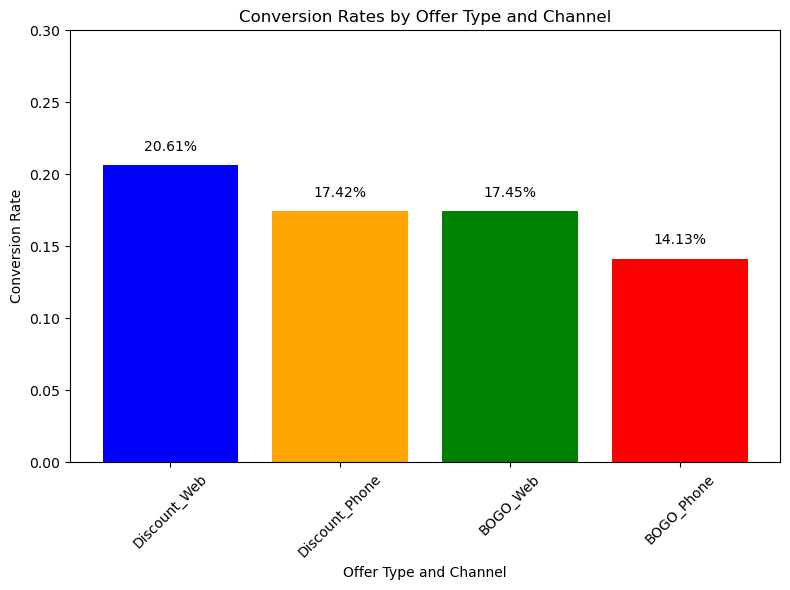

In [25]:
#Plot 

groups = ['Discount_Web', 'Discount_Phone', 'BOGO_Web', 'BOGO_Phone']
conversion_rates = [conversion_rate_discount_web, conversion_rate_discount_phone,
                    conversion_rate_bogo_web, conversion_rate_bogo_phone]


plt.figure(figsize=(8, 6))
plt.bar(groups, conversion_rates, color=['blue', 'orange', 'green', 'red'])
plt.title('Conversion Rates by Offer Type and Channel')
plt.xlabel('Offer Type and Channel')
plt.ylabel('Conversion Rate')
plt.ylim(0, 0.3)  
plt.xticks(rotation=45)  
#plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text labels for each bar
for i in range(len(groups)):
    plt.text(i, conversion_rates[i] + 0.01, f'{conversion_rates[i]:.2%}', ha='center')

plt.tight_layout()
plt.show()
